<AxesSubplot:xlabel='time', ylabel='function'>

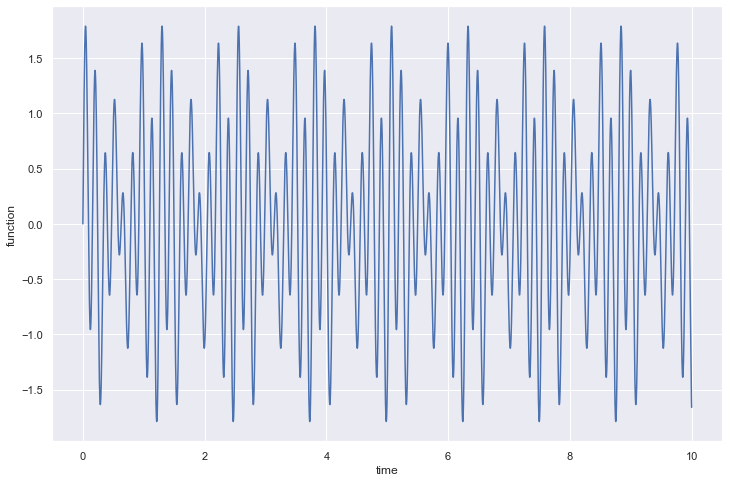

In [1]:
import math
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
from scipy import interpolate
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()
sns.set(rc={'figure.figsize':(20,10)})
%matplotlib inline

def functionForEMD(x):
    return math.sin(x*40)+math.sin(x*25)*math.cos(x*10)

t = np.arange (0, 10, 0.00125)
df =  pd.DataFrame([t]).T
df.columns = ["time"]
df["function"] = df["time"].apply(functionForEMD)
df.columns = ["time","function"]
plt.figure(figsize=(12,8))
sns.lineplot(x=df["time"],y=df["function"], palette="tab10", linewidth=1.5)

In [2]:
# currentDiff = residual.diff()
iterator = 0
residual = df["function"]

In [9]:
thresh = 0.3 

In [3]:
xfit = df.time.values
while True:
    iterator += 1
    SD = 1
    df["residual"+str(iterator)] =  residual
    h = df["residual"+str(iterator)]
    while SD>thresh:
        n=1
        df['min'] = df.iloc[argrelextrema(df["residual"+str(iterator)].values, np.less_equal,
                        order=n)[0]]['function']
        df['max'] = df.iloc[argrelextrema(df["residual"+str(iterator)].values, np.greater_equal,
                        order=n)[0]]['function']
        
        if(len(residual[np.sign(residual).diff().ne(0)])<=2):
            print("Breaking Zero Crossing Less than 2"+str(iterator))
            break
        x , y = df[~df["min"].isna()].time.values,df[~df["min"].isna()].function.values
        if(len(y)<=2):
            print("Breaking Y"+str(iterator))
            break
        s = interpolate.InterpolatedUnivariateSpline(x, y,k=2)
        df["yfit_min"] = s(xfit)
        
        x , y = df[~df["max"].isna()].time.values,df[~df["max"].isna()].function.values
        s = interpolate.InterpolatedUnivariateSpline(x, y,k=2)
        df["yfit_max"] = s(xfit)



        df["mean"] = (df["yfit_min"] + df["yfit_max"])/2
        prevh = h 
        h = prevh - df["mean"]
        SD = np.sum(np.power((prevh-h),2)/(np.power(prevh,2))+0.000001)
#         print(SD,iterator)
#         print(SD,iterator)
#         print(df.columns)
        
#     residual = residual - h
    
    df["residual"+str(iterator)] = df["mean"]
    
    if(len(residual[np.sign(residual).diff().ne(0)])<=2):
        print("Breaking Zero Crossing Less than 2:Outer"+str(iterator))
        break
    residual =  residual - h
#     print(SD,iterator)
#     print(df.columns)
residual = h
df["residual"+str(iterator)] = residual

Breaking Y5
Breaking Zero Crossing Less than 26
Breaking Zero Crossing Less than 2:Outer6


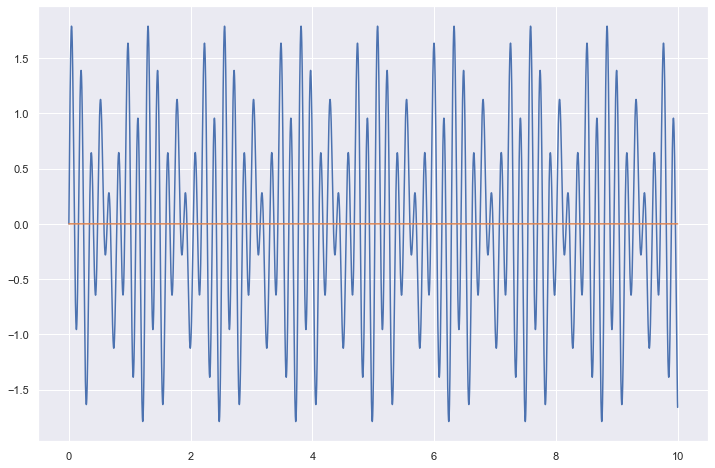

In [4]:
plt.figure(figsize=(12,8))
# plt.scatter(df.time, df['min'], c='r')
# plt.scatter(df.time, df['max'], c='g')
plt.plot(df["time"].values, df['function'].values)
# plt.plot(df["time"].values, df["yfit_min"].values)
# plt.plot(df["time"].values, df["yfit_max"].values)
# plt.plot(df["time"].values, df["mean"].values)
plt.plot(df["time"].values, residual.values)
plt.show()

In [5]:
residualList = [x for x in df.columns if "resi" in x ]

def recon(x):
    ret = 0
    for y in x:
        ret = ret + y
    return ret
df["Reconstruct"] = df[residualList].apply(lambda x : recon(x),axis=1)

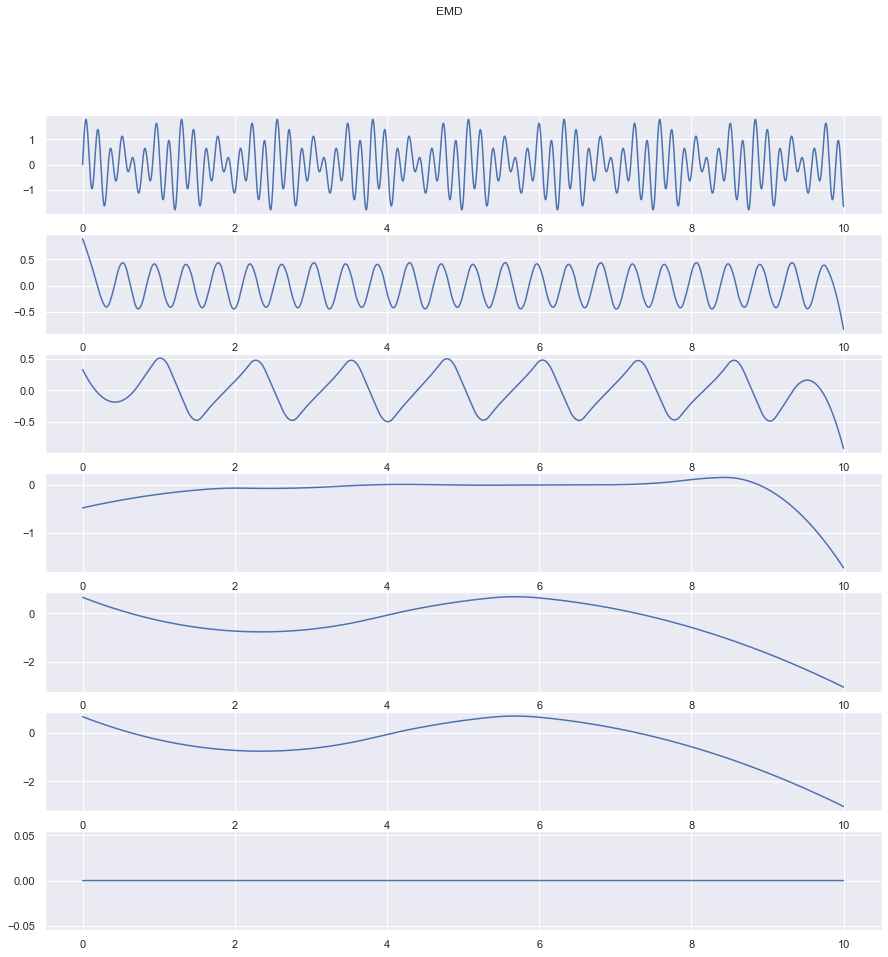

In [6]:
fig, ax = plt.subplots(len(residualList)+1,figsize=(15, 15))
fig.suptitle('EMD')
ax[0].plot(df.time.values, df.function.values)
for i in range(0,len(residualList)):
    ax[i+1].plot(df.time.values, df["residual"+str(i+1)].values)


In [7]:
df

,time,function,residual1,min,max,yfit_min,yfit_max,mean,residual2,residual3,residual4,residual5,residual6,Reconstruct
0,0.00000,0.000000,0.893105,0.000000,0.000000,0.000000,1.310753,0.655376,0.326982,-0.484041,0.655376,0.655376,0.0,2.046799
1,0.00125,0.081222,0.888152,0.081222,0.081222,-0.001274,1.309010,0.653868,0.323967,-0.483597,0.653868,0.653868,0.0,2.036260
2,0.00250,0.162273,0.883189,0.162273,0.162273,-0.002546,1.307269,0.652361,0.320961,-0.483153,0.652361,0.652361,0.0,2.025720
3,0.00375,0.242985,0.878216,0.242985,0.242985,-0.003818,1.305528,0.650855,0.317963,-0.482709,0.650855,0.650855,0.0,2.015180
4,0.00500,0.323188,0.873233,0.323188,0.323188,-0.005089,1.303787,0.649349,0.314975,-0.482265,0.649349,0.649349,0.0,2.004641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,9.99375,-1.520369,-0.782050,-1.520369,-1.520369,-1.660766,-4.391954,-3.026360,-0.896963,-1.720148,-3.026360,-3.026360,0.0,-9.451882
7996,9.99500,-1.559680,-0.791892,-1.559680,-1.559680,-1.660660,-4.395902,-3.028281,-0.902570,-1.723154,-3.028281,-3.028281,0.0,-9.474178
7997,9.99625,-1.596177,-0.801771,-1.596177,-1.596177,-1.660553,-4.399852,-3.030202,-0.908192,-1.726163,-3.030202,-3.030202,0.0,-9.496531
7998,9.99750,-1.629760,-0.811690,-1.629760,-1.629760,-1.660446,-4.403803,-3.032124,-0.913828,-1.729174,-3.032124,-3.032124,0.0,-9.518940


Text(0.5, 0, 'Time(t)')

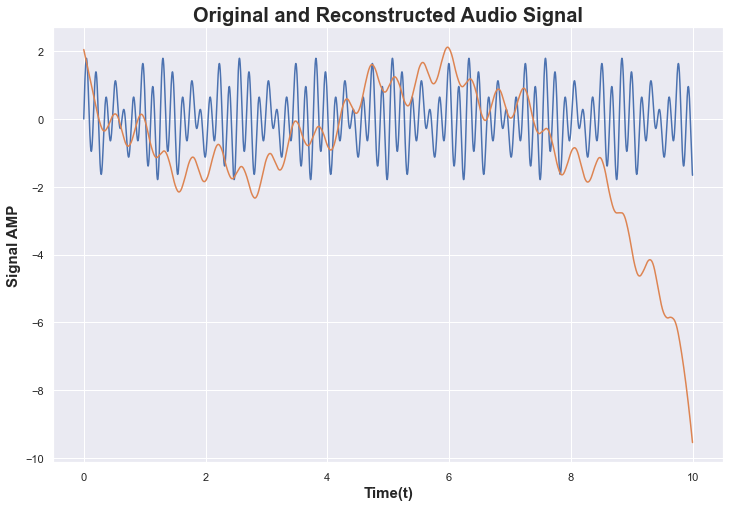

In [8]:
plt.figure(figsize=(12,8))
# plt.scatter(df.time, df['min'], c='r')
# plt.scatter(df.time, df['max'], c='g')
plt.plot(df["time"].values, df['function'].values)
plt.plot(df["time"].values, df['Reconstruct'].values)
plt.title("Original and Reconstructed Audio Signal",fontsize=20,fontweight='bold')
plt.ylabel("Signal AMP",fontsize=15,fontweight='bold')
plt.xlabel("Time(t)",fontsize=15,fontweight='bold')